<a href="https://colab.research.google.com/github/dangdinhtai0001/graph-playground/blob/master/VRP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib pandas networkx deap plotly scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.1 MB/s eta 0:00:00


In [2]:
import random

num_depots = 3
num_customers = 20
min_coordinate = 0
max_coordinate = 100
min_demand = 1
max_demand = 20
vehicle_capacity = 50
max_vehicles_per_depot = 5
min_service_time = 5
max_service_time = 20
min_energy_consumption = 1
max_energy_consumption = 5
max_energy = 100
min_recharging_time = 30
max_recharging_time = 60
min_start_time = 0
max_start_time = 24 * 60  # Convert 24 hours to minutes

depots = [(random.randint(min_coordinate, max_coordinate), random.randint(min_coordinate, max_coordinate)) for _ in range(num_depots)]
customers = [(random.randint(min_coordinate, max_coordinate), random.randint(min_coordinate, max_coordinate), random.randint(min_demand, max_demand), random.randint(min_service_time, max_service_time)) for _ in range(num_customers)]
energy_consumption = [random.uniform(min_energy_consumption, max_energy_consumption) for _ in range(num_customers)]

data = {
    'depots': depots,
    'customers': customers,
    'vehicle_capacity': vehicle_capacity,
    'max_vehicles_per_depot': max_vehicles_per_depot,
    'energy_consumption': energy_consumption,
    'max_energy': max_energy,
    'recharging_time': random.randint(min_recharging_time, max_recharging_time),
    'start_time': [random.randint(min_start_time, max_start_time) for _ in range(num_depots * max_vehicles_per_depot)],
}

print(data)

def is_data_feasible(data, min_start_time, max_start_time, vehicle_capacity):
    total_demand = sum(customer[2] for customer in data['customers'])
    total_vehicle_capacity = vehicle_capacity * data['max_vehicles_per_depot'] * len(data['depots'])

    if total_demand > total_vehicle_capacity:
        return False

    for customer in data['customers']:
        if customer[2] > vehicle_capacity:
            return False

        if customer[3] > (max_start_time - min_start_time):
            return False

    return True

if is_data_feasible(data, min_start_time, max_start_time, vehicle_capacity):
    print("The dataset is feasible.")
else:
    print("The dataset is not feasible.")



{'depots': [(72, 72), (90, 12), (21, 56)], 'customers': [(17, 71, 7, 18), (31, 51, 20, 9), (30, 38, 15, 14), (39, 2, 18, 12), (30, 24, 17, 15), (61, 15, 5, 20), (89, 25, 12, 16), (96, 72, 6, 13), (63, 5, 16, 16), (98, 95, 17, 19), (30, 86, 6, 12), (9, 16, 12, 9), (71, 41, 18, 20), (46, 57, 10, 15), (37, 57, 13, 17), (63, 67, 19, 18), (67, 69, 6, 12), (1, 2, 15, 19), (23, 77, 20, 12), (14, 49, 15, 5)], 'vehicle_capacity': 50, 'max_vehicles_per_depot': 5, 'energy_consumption': [3.020432932580753, 2.3121623756531022, 2.0024350649632257, 1.0663699671909526, 3.885115475337828, 4.964457402241322, 3.4182707371855163, 3.9295988053264934, 2.623256289951776, 4.804356130571078, 3.503355774995907, 3.849313513556034, 4.843598505053805, 4.384928733722978, 3.3937828632441964, 2.2833166631314676, 2.036248639066338, 4.414529784385852, 4.871955193116234, 3.4943752907706447], 'max_energy': 100, 'recharging_time': 47, 'start_time': [1043, 343, 1126, 654, 368, 778, 1130, 105, 326, 1116, 1169, 1275, 1278, 4

Depots:
           x   y
depot_id        
0         72  72
1         90  12
2         21  56

Customers:
              x   y  demand  service_time
customer_id                              
0            17  71       7            18
1            31  51      20             9
2            30  38      15            14
3            39   2      18            12
4            30  24      17            15
5            61  15       5            20
6            89  25      12            16
7            96  72       6            13
8            63   5      16            16
9            98  95      17            19
10           30  86       6            12
11            9  16      12             9
12           71  41      18            20
13           46  57      10            15
14           37  57      13            17
15           63  67      19            18
16           67  69       6            12
17            1   2      15            19
18           23  77      20            12
19           

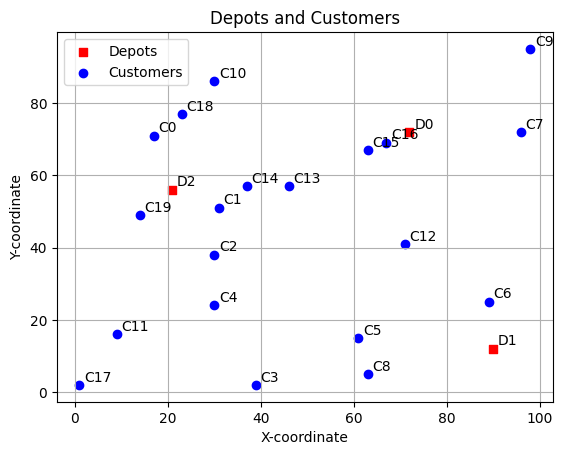

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for depots
depot_df = pd.DataFrame(data['depots'], columns=['x', 'y'])
depot_df.index.name = 'depot_id'

# Create a DataFrame for customers
customer_df = pd.DataFrame(data['customers'], columns=['x', 'y', 'demand', 'service_time'])
customer_df.index.name = 'customer_id'

# Create a DataFrame for vehicles
vehicles = []
vehicle_count = 0

for depot_id, depot in enumerate(data['depots']):
    for _ in range(data['max_vehicles_per_depot']):
        vehicles.append({
            'vehicle_id': vehicle_count,
            'depot_id': depot_id,
            'capacity': data['vehicle_capacity'],
            'start_time': data['start_time'][vehicle_count]
        })
        vehicle_count += 1

vehicle_df = pd.DataFrame(vehicles)

# Display depots in a table
print("Depots:")
print(depot_df)

# Display customers in a table
print("\nCustomers:")
print(customer_df)

# Display vehicles in a table
print("\nVehicles:")
print(vehicle_df)


# Visualize depots and customers in a scatter plot
plt.scatter(depot_df['x'], depot_df['y'], c='red', marker='s', label='Depots')
plt.scatter(customer_df['x'], customer_df['y'], c='blue', marker='o', label='Customers')

for i, row in depot_df.iterrows():
    plt.annotate(f'D{i}', (row['x'] + 1, row['y'] + 1))

for i, row in customer_df.iterrows():
    plt.annotate(f'C{i}', (row['x'] + 1, row['y'] + 1))

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Depots and Customers')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
from deap import algorithms, base, creator, tools
import math

# Create the fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


def get_routes(individual, data):
    routes = []
    current_route = []
    current_load = 0
    current_depot = None

    for customer_id in individual:
        customer_demand = data['customers'][customer_id][2]

        # Check if adding the customer to the current route would exceed the vehicle capacity
        if current_load + customer_demand > data['vehicle_capacity']:
            # Close the current route and start a new one
            current_route.append(current_depot)  # Return to the depot
            routes.append(current_route)
            current_route = []
            current_load = 0

        # Select the depot with the shortest distance to the current customer
        current_depot = min(data['depots'], key=lambda depot: euclidean_distance(customers[customer_id][:2], depot))

        if not current_route:
            current_route.append(current_depot)  # Start the route from the depot

        current_route.append(customer_id)
        current_load += customer_demand

    # Add the last route
    if current_route:
        current_route.append(current_depot)  # Return to the depot
        routes.append(current_route)

    return routes

# Function to generate a random solution
def create_individual(data):
    customers = list(range(len(data['customers'])))
    random.shuffle(customers)
    return creator.Individual(customers)

# Function to evaluate a solution
def evaluate(individual, data):
    # Objective 1: Transportation cost
    cost = 0
    # Objective 2: Delivery time
    delivery_time = 0
    
    routes = []
    current_route = []
    current_load = 0
    
    for customer_id in individual:
        customer_demand = data['customers'][customer_id][2]
        
        # Check if adding the customer to the current route would exceed the vehicle capacity
        if current_load + customer_demand > data['vehicle_capacity']:
            # Close the current route and start a new one
            routes.append(current_route)
            current_route = []
            current_load = 0
        
        current_route.append(customer_id)
        current_load += customer_demand
    
    # Add the last route
    if current_route:
        routes.append(current_route)
    
    # Calculate objectives here
    # ...
    
    return cost, delivery_time

# Register the required functions with the DEAP toolbox
toolbox = base.Toolbox()
toolbox.register("individual", create_individual, data)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate, data=data)

# Set the population size and number of generations
population_size = 100
num_generations = 250

# Create the initial population
population = toolbox.population(n=population_size)

# Perform the NSGA-II algorithm
result_population, _ = algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=0.7, mutpb=0.3, ngen=num_generations, verbose=False)

# Get the best solutions in the final population
best_individuals = tools.selBest(result_population, 1)

print("Best individual:")
print(best_individuals[0])
print("Objectives:")
print(evaluate(best_individuals[0], data))
print("Routes:")
print(get_routes(best_individuals[0], data))

Best individual:
[11, 4, 1, 17, 6, 2, 9, 18, 14, 15, 16, 5, 13, 8, 7, 3, 10, 12, 19, 0]
Objectives:
(0, 0)
Routes:
[[(21, 56), 11, 4, 1, (21, 56)], [(21, 56), 17, 6, 2, (21, 56)], [(72, 72), 9, 18, 14, (21, 56)], [(72, 72), 15, 16, 5, 13, (21, 56)], [(90, 12), 8, 7, 3, 10, (21, 56)], [(72, 72), 12, 19, 0, (21, 56)]]


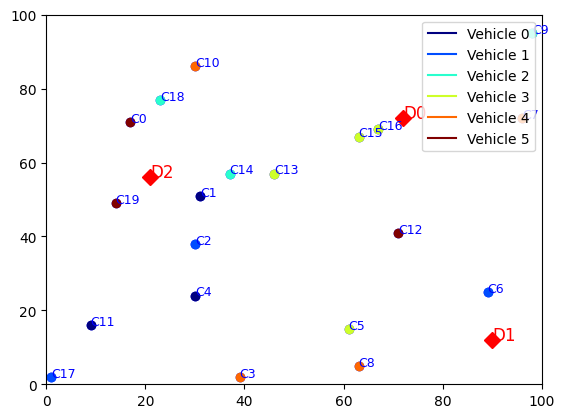

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Prepare data for visualization
depots = data['depots']
customers = data['customers']
routes = get_routes(best_individuals[0], data)

def update(frame_number):
    ax.clear()
    
    # Plot depots
    for idx, depot in enumerate(depots):
        ax.plot(depot[0], depot[1], 'rD', markersize=8)
        ax.text(depot[0], depot[1], f"D{idx}", fontsize=12, color='red')

    # Plot customers
    for idx, customer in enumerate(customers):
        ax.plot(customer[0], customer[1], 'bo', markersize=6)
        ax.text(customer[0], customer[1], f"C{idx}", fontsize=9, color='blue')

    colors = plt.cm.jet(np.linspace(0, 1, len(routes)))

    count = 0
    for vehicle, route in enumerate(routes):
        color = colors[vehicle]
        for i in range(len(route) - 1):
            node_from = route[i]
            node_to = route[i + 1]
            
            if isinstance(node_from, int):
                coords_from = customers[node_from][:2]
                ax.plot(coords_from[0], coords_from[1], 'o', markersize=6, color=color)
            else:
                coords_from = node_from

            if isinstance(node_to, int):
                coords_to = customers[node_to][:2]
            else:
                coords_to = node_to

            if count < frame_number:
                ax.plot([coords_from[0], coords_to[0]], [coords_from[1], coords_to[1]], color=color, linestyle='-')
                count += 1

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # Add legend for vehicles
    legend_elements = [plt.Line2D([0], [0], color=colors[i], label=f'Vehicle {i}') for i in range(len(routes))]
    ax.legend(handles=legend_elements, loc='upper right')

fig, ax = plt.subplots()

# Calculate the total number of frames
total_frames = sum([len(route) - 1 for route in routes])

ani = animation.FuncAnimation(fig, update, frames=total_frames, repeat=True, interval=1000)
HTML(ani.to_jshtml())
